## Part 1: Data Description

### **players.csv**

#### The dataset players.csv contains 196 observations, each observation containing information about the player using 7 varibles

In [20]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
options(repr.matrix.max.rows = 6)

players<- read.csv("players.csv")
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [21]:
summary_players<- summary(players)
summary

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

The table below shows the variables given in players.csv, the type of variable, and a breif description of what the variable means:

| Variable | Type of Variable | Explanation |
| ---------|------------------|-------------|
| experience|character   | gives a description of the players experience with the game (Beginner, Amateur, Veteran, Pro) |
| subscribe | logical  | whether or not the player has subscribed (TRUE or FALSE)|
| hashedEmail| character   |email of the player in a safe representation |
| played_hours| double    | hours played in the server|
| name| character   | name of the player |
| gender | character    | gender of the player|
| age | integer   | age of the player |

There is one player in this data set that does not have an age listed. A potential issue with this data set could be that, depending on how the information was collected, variables like age could be inaccurate.

### **sessions.csv**

#### The dataset sessions.csv contains 1535 observations, each observation containing information about the session using 5 varibles¶

In [22]:

sessions<- read.csv("sessions.csv")
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [23]:
summary_sessions<- summary(sessions)
summary

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

The table below shows the variables given in sessions.csv, the type of variable, and a breif description of what the variable means:

| Variable | Type of Variable | Explanation |
| ---------|------------------|-------------|
| hashedEmail| character   |email of the player in a safe representation |
|start_time| character   | the date and time that the session started|
| end_time| character  | the date and time that the session ended |
| original_start_time| double | the start time in UNIX time  |
|original_end_time | double  | the end time in UNIX time  |

## Part 2: Questions

### The broad question that we will address is: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### We will focus specifically on how a players age can predct if they will subscribe to the newsletter with our question being: **_Can age of a player predict subscription to a newsletter in players.csv?_**

 We can do this through observing our variables age and subscription and analyzing their relationship. By creating a graph that demonstrates this relationship, using regression, and looking at the accuracy of the prediction we can answer this question.

## Part 3: Exploratory Data Analysis and Visulization

In [26]:
players
summary_players


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [34]:
avg_played_hours<- mean(players$played_hours, na.rm= TRUE)|>
    round(2)
avg_age<- mean(players$Age, na.rm= TRUE)|>
    round(2)
avg_age
avg_played_hours

[1] 21.14

[1] 5.85

#### players.csv mean values

| Variable | Mean |
| ---------|------------------|
|played_hours|5.85  |
| age |21.14  | 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


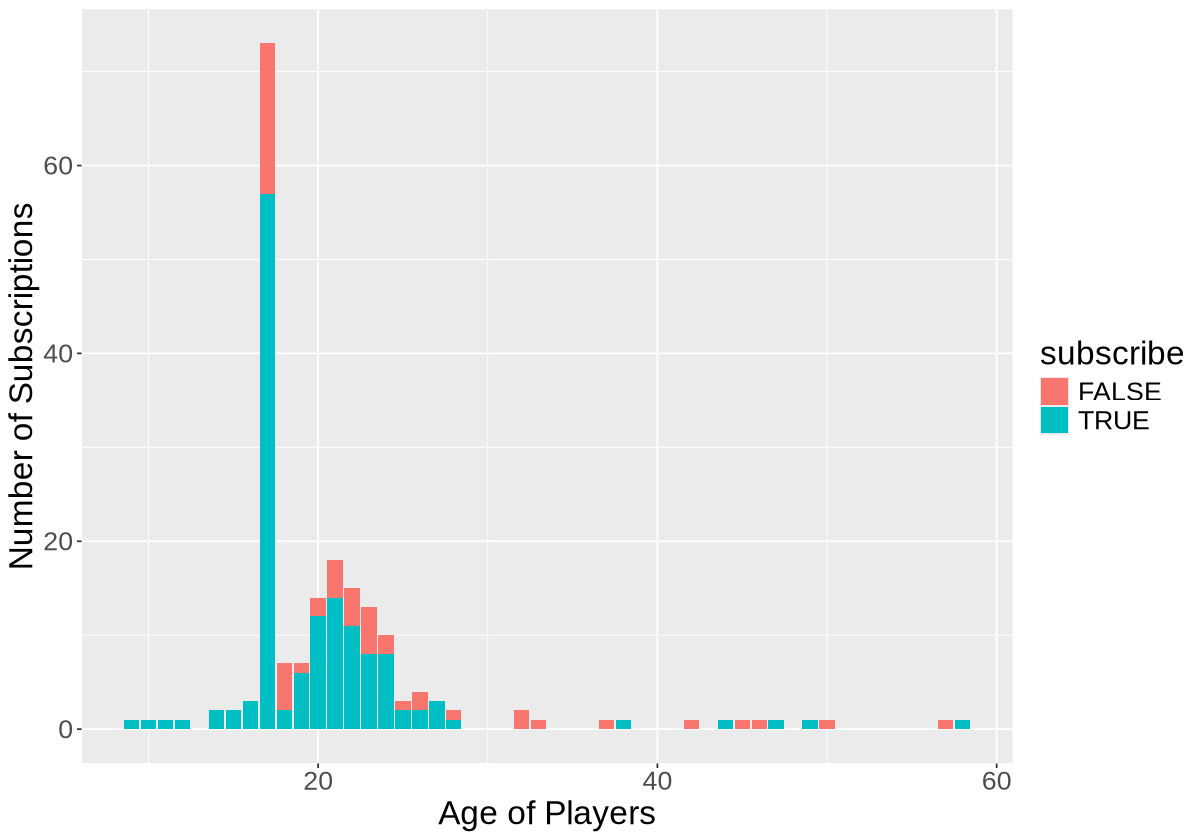

In [51]:
options(repr.plot.width = 10, repr.plot.height = 7) 

age_vs_subscription <- ggplot(players, aes(x = Age, fill = subscribe)) + 
    geom_bar(stat = "count") +
    xlab("Age of Players") +
    ylab("Number of Subscriptions") + 
    theme(text = element_text(size = 20))
age_vs_subscription

### Visualization Demonstrating the Relationship between Age and Subscription

This plot shows the number of players that did or did not subscribe to the news letter per age. To use these results effectively we would have to first make sure that we account for the fact that there were clearly more players of some ages included in the study than others.

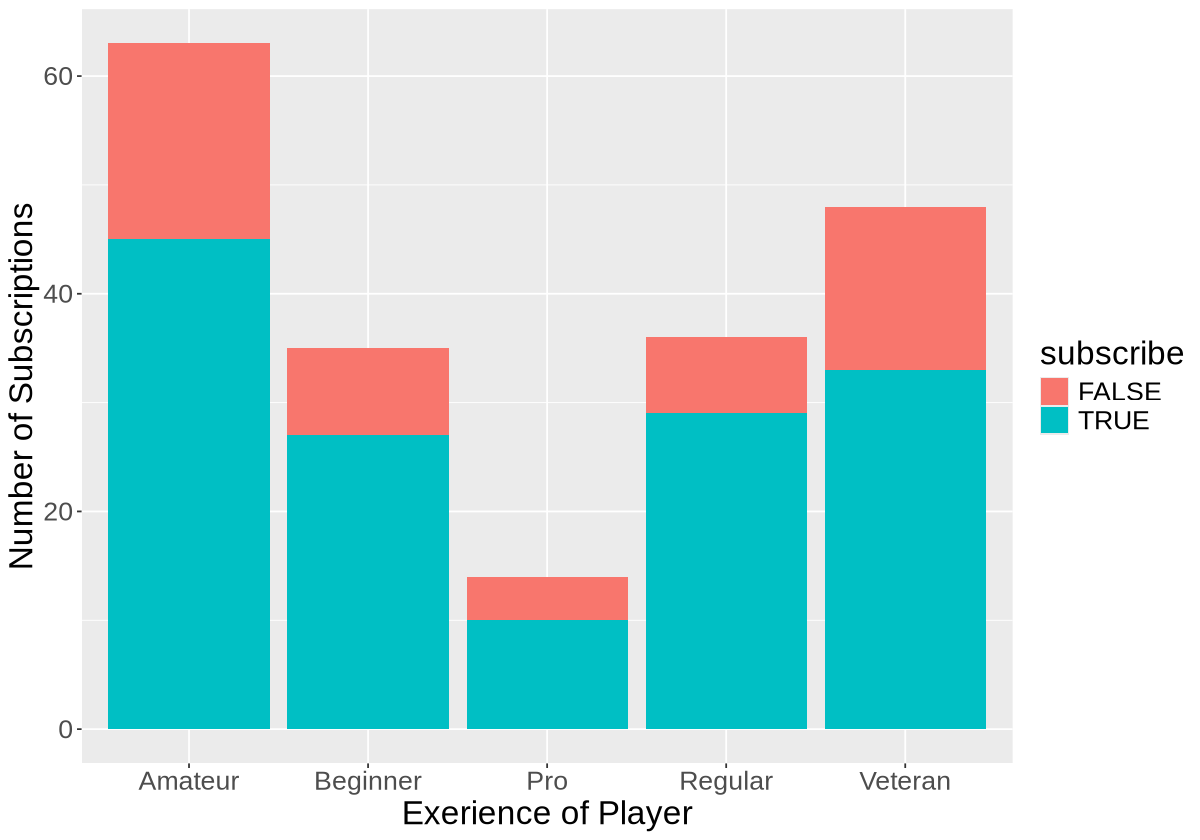

In [59]:
options(repr.plot.width = 10, repr.plot.height = 7) 
age_vs_subscription <- ggplot(players, aes(x = experience, fill = subscribe)) + 
    geom_bar(stat = "count") +
    xlab("Exerience of Player") +
    ylab("Number of Subscriptions") + 
    theme(text = element_text(size = 20))
age_vs_subscription

This visualization shows the relationship between the experience of the player and the subscription number. Again this data would need to first be altered as there are uneven numbers of players in each category.